### As I examine the data, I have a  creeping suspicion that the dataset is fake. You surmise that my boss handed me a spurious data in order to test the data engineering skills of his new employee. To confirm my hunch, I decide to take the following steps to generate a visualization of the data, with which I will confront my boss:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config_file import credentials 

In [2]:
engine = create_engine(credentials)
connection = engine.connect()
print(engine.table_names())

['titles', 'dept_emp', 'department', 'dept_manager', 'salary', 'employees']


## Bonus Question :

### 1. Import the SQL database into Pandas.

In [3]:
salary_db = pd.read_sql("SELECT * FROM salary" , connection)
salary_db.head(3)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006


In [4]:
employee_db = pd.read_sql("SELECT * FROM employees" , connection)
employee_db.head(3)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21


In [5]:
title_db = pd.read_sql("SELECT * FROM titles" , connection)
title_db

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


### 2. Create a histogram to visualize the most common salary 'ranges' for employees.
### 3. Create a bar chart of average salary by title.

#### To acheive that , 
                1. merge salary table with employees table to get title_id with emp_no
                2. merge result table with title table to get salary by title_id
                
##### Merging salary table with employee table and renaming emp_title_id to title_id:

In [8]:
salary_by_title_id = salary_db.merge(employee_db , how= 'inner', on = 'emp_no')
salary_by_title_id = salary_by_title_id[['emp_no','salary','emp_title_id']]
salary_by_title_id.columns = ['emp_no','salary','title_id']
salary_by_title_id.head(3)

,emp_no,salary,title_id
0,10001,60117,e0003
1,10002,65828,s0001
2,10003,40006,e0003


###### Merging the above table with titles table:

In [9]:
salary_by_title_name = salary_by_title_id.merge(title_db , how= 'inner', on = 'title_id')
# Re-arranging and filtering columns
salary_by_title_name = salary_by_title_name[['emp_no','title', 'salary']]
salary_by_title_name.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10003,Senior Engineer,40006
2,10004,Senior Engineer,40054
3,10006,Senior Engineer,40000
4,10009,Senior Engineer,60929


### Average salary  by title

In [31]:

salary_group = salary_by_title_name.groupby('title')
salary_group = pd.DataFrame(salary_group ['salary'].mean())
salary_group = salary_group.sort_values(by = 'salary' , ascending=False)
salary_group

,salary
title,
Senior Staff,58550.172704
Staff,58465.382850
Manager,51531.041667
Technique Leader,48582.896092
Assistant Engineer,48564.434447
Engineer,48535.336511
Senior Engineer,48506.799871


### Histogram of salary range by employees

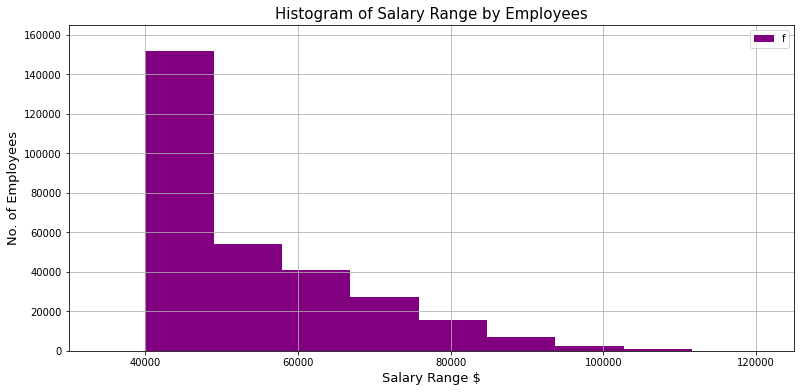

In [23]:
# generate a histogram of salary by employees
plt.figure(figsize = (13,6))
plt.hist(salary_by_title_name['salary'] ,  color = 'purple' )
plt.xlabel("Salary Range $" , size = 13) 
plt.ylabel("No. of Employees" , size = 13 ) 
plt.legend('fd') 
plt.title('Histogram of Salary Range by Employees' , size =15 ) 
plt.xlim(30000, 125000)
plt.ylim(0, 165000)
plt.grid() 
# Show plot 
plt.show() 

### Bar chart of average salary by title

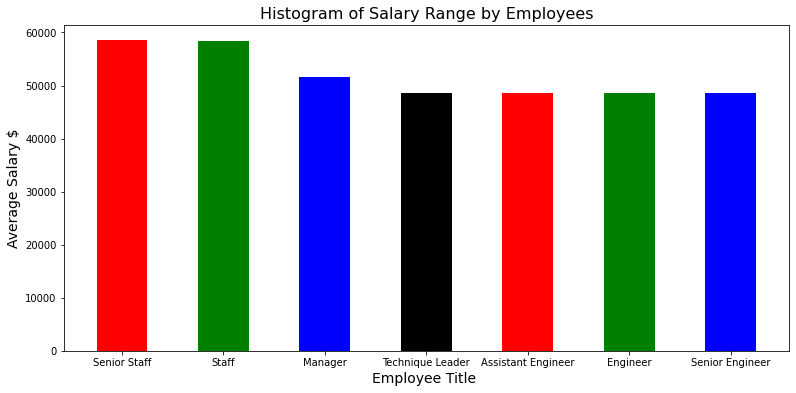

In [47]:
# generate a bar chart of salary of employees by thier title
plt.figure(figsize = (13,6))
plt.bar(salary_group.index , salary_group.salary,  color = ['r','g','b','k'] , width=0.5 )
plt.xlabel("Employee Title " , size = 14) 
plt.ylabel("Average Salary $" , size = 14 ) 
plt.title('Histogram of Salary Range by Employees' , size =16 ) 

# Show plot 
plt.show() 

##  Boss : "Search your ID number." 
### ME : 499942

In [48]:
## Look for my Id_no in the database
employee_499942 = employee_db.loc[employee_db['emp_no'] == 499942,:]
employee_499942

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1/10/1963,April,Foolsday,F,1997-02-10


<img src="Images/april_fool.jpg" width="200">